Here I'll run some test on the following databases : "lanl-comprehensive_700k.csv" and "lanl-comprehensive-unified-auth.csv".
The model training will disconsider the time column. The experiments will be the following:

 1 : Experiment with one hot enconding and label enc on the database "lanl-comprehensive-unified-auth.csv" dropping "computer_source"
    
 2 : Experiment with one hot enconding and label enc on the database "lanl-comprehensive-unified-auth.csv" dropping "computer_source"
 
 3 : Experiment with one hot enconding and label enc on the database "lanl-comprehensive_700k.csv" dropping "src_comp"
 
 4 : Experiment with one hot enconding and label enc on the database "lanl-comprehensive_700k.csv" dropping "src_user"
 
 5 : Experiment with label enconding and one-hot-enc on both datasets without dropping columns

*Isolation Forest test*

In [1]:
%pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 26.7 MB 21 kB/s              
     |████████████████████████████████| 306 kB 33.5 MB/s            
     |████████████████████████████████| 41.6 MB 7.4 kB/s             ��███▍   | 36.9 MB 32.3 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 13.0 MB/s            |████████████▉                   | 6.7 MB 13.0 MB/s eta 0:00:01ta 0:00:01
You should consider upgrading via the '/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


***Importing the database***

In [2]:
# only run cells below to install dependencies
import sys
!{sys.executable} -m pip install numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/bin/python3 -m pip install --upgrade pip' command.


In [3]:
!{sys.executable} -m pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.7 MB 3.6 MB/s            
     |████████████████████████████████| 247 kB 20.6 MB/s            
     |████████████████████████████████| 503 kB 17.0 MB/s            
You should consider upgrading via the '/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np

Functions to be used

In [65]:
def preparaTabela(nomeDataset, columnDrop = None, percentagem = 0.2):
    if (nomeDataset == "lanl-comprehensive-unified-auth.csv") :
        X = pd.read_csv("lanl-comprehensive-unified-auth.csv",header=None) #an m-by-n dataset with m observations
        X.rename(columns={0:'time', 1:'computer_source',2:'user',3:'computer_dest', 4:'label'}, inplace=True)
        X = X.iloc[1: , :]
        X = X.drop('time', axis = 1)
        #labelsX = X.pop('label').to_numpy()
        
        if(columnDrop == "computer_source"):
            X = X.drop('computer_source', axis = 1)
        elif(columnDrop == "user"):
            X = X.drop("user", axis = 1)    
        
        return X #, labelsX
            
    elif(nomeDataset == "lanl-comprehensive_700k.csv"):
        Y = pd.read_csv("lanl-comprehensive_700k.csv",header=None, dtype={"time": int, "src_user": "string", "src_comp": "string","dst_comp": "string", "is_malicious": int}) #an m-by-n dataset with m observations
        Y.rename(columns={0:'time', 1:'src_user',2:'src_comp',3:'dst_comp', 4:'is_malicious'}, inplace=True)
        Y = Y.drop('time', axis = 1)
        Y = Y.iloc[1: , :] 
        Y = Y.sample(n=None, frac=percentagem, replace=True, weights=None, random_state=42, axis=None, ignore_index=False) ## dataset too big for my pc
        #labelsY = Y.pop('is_malicious').to_numpy()
        
        if(columnDrop == "src_comp"):
            Y = Y.drop('src_comp', axis = 1)
        elif(columnDrop == "src_user"):
            Y = Y.drop("src_user", axis = 1)
        
        return Y #, labelsY

*Experiment 1*

In [116]:
X1 = preparaTabela("lanl-comprehensive-unified-auth.csv", "computer_source")
print(X1.shape)
X1.head()
print(X1)
## dropar time

(28953, 3)
          user computer_dest label
1      U451666       C313779     0
2      U451666       C313779     0
3      U457678       C639081     0
4      U457678       C639081     0
5      U416717       C825721     0
...        ...           ...   ...
28949  U141270       C200079     1
28950  U141270       C200079     1
28951  U141270       C200079     1
28952  U141270       C200079     1
28953  U632036       C632332     1

[28953 rows x 3 columns]


*Experiment 2*

In [73]:
X2 = preparaTabela("lanl-comprehensive-unified-auth.csv", "user")
print(X2.shape)
X2.head()

(28953, 3)


,computer_source,computer_dest,label
1,C288750,C313779,0
2,C288750,C313779,0
3,C206546,C639081,0
4,C206546,C639081,0
5,C206546,C825721,0


*Experiment 3*

In [74]:
Y1 = preparaTabela("lanl-comprehensive_700k.csv", "src_comp", percentagem = 0.4)
print(Y1.shape)
Y1.head()

/tmp/ipykernel_13438/3505867173.py:17: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  Y = pd.read_csv("lanl-comprehensive_700k.csv",header=None, dtype={"time": int, "src_user": "string", "src_comp": "string","dst_comp": "string", "is_malicious": int}) #an m-by-n dataset with m observations


(290061, 3)


,src_user,dst_comp,is_malicious
121959,C417$@DOM1,C625,0
671156,C87$@DOM1,C1065,0
131933,C2370$@DOM1,C1065,0
365839,C480$@DOM1,C625,0
259179,U924@DOM1,C529,0


*Experiment 4*

In [75]:
Y2 = preparaTabela("lanl-comprehensive_700k.csv", "src_user")
print(Y2.shape)
Y2.head()

/tmp/ipykernel_13438/3505867173.py:17: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  Y = pd.read_csv("lanl-comprehensive_700k.csv",header=None, dtype={"time": int, "src_user": "string", "src_comp": "string","dst_comp": "string", "is_malicious": int}) #an m-by-n dataset with m observations


(145030, 3)


,src_comp,dst_comp,is_malicious
121959,C417,C625,0
671156,C87,C1065,0
131933,C2370,C1065,0
365839,C480,C625,0
259179,C529,C529,0


In [117]:
count = 0
for i in X1["label"]:
    if i == '1':
        count += 1
print("total of maligne samples in the dataset '700k': " + str(count))

total of maligne samples in the dataset '700k': 748


*Experiment 5*

In [78]:
Y3 = preparaTabela("lanl-comprehensive_700k.csv")
print(Y3.shape)
Y3.head()

(145030, 4)


/tmp/ipykernel_13438/3505867173.py:17: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  Y = pd.read_csv("lanl-comprehensive_700k.csv",header=None, dtype={"time": int, "src_user": "string", "src_comp": "string","dst_comp": "string", "is_malicious": int}) #an m-by-n dataset with m observations


,src_user,src_comp,dst_comp,is_malicious
121959,C417$@DOM1,C417,C625,0
671156,C87$@DOM1,C87,C1065,0
131933,C2370$@DOM1,C2370,C1065,0
365839,C480$@DOM1,C480,C625,0
259179,U924@DOM1,C529,C529,0


In [79]:
X3 = preparaTabela("lanl-comprehensive-unified-auth.csv")
print(X3.shape)
X3.head()

(28953, 4)


,computer_source,user,computer_dest,label
1,C288750,U451666,C313779,0
2,C288750,U451666,C313779,0
3,C206546,U457678,C639081,0
4,C206546,U457678,C639081,0
5,C206546,U416717,C825721,0


One Hot Encoding

In [101]:
## fazer depois do label encoder
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder()

In [102]:
#X = encoder.fit_transform(X2[['user', 'computer_dest']]).toarray()

In [103]:
#Y = encoder.fit_transform(Y2[['src_comp', 'dst_comp']]).toarray()

In [104]:
#print(Y2)

In [105]:
#print(X2)

*Labels Encoding*

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
def utilizaLabelEnc(dataFrame, col1, col2, col3 = None):
    enc_1 = LabelEncoder()
    enc_2 = LabelEncoder()
    enc_1.fit(dataFrame[col1])
    enc_2.fit(dataFrame[col2])
    if(col3 != None):
        enc_3 = LabelEncoder()#mais um encoder(fazer depois)
    df = dataFrame
    df[col1] = enc_1.transform(df[col1])
    df[col2] = enc_2.transform(df[col2])
    return df

*Exp 1*

In [82]:
X1_labelEnc = utilizaLabelEnc(X1, "user", "computer_dest")
X1_labelEnc.head()

,user,computer_dest,label
1,825,612,0
2,825,612,0
3,835,1282,0
4,835,1282,0
5,761,1673,0


*Exp 2*

In [83]:
X2_labelEnc = utilizaLabelEnc(X2, "computer_source", "computer_dest")
X2_labelEnc.head()

,computer_source,computer_dest,label
1,394,612,0
2,394,612,0
3,252,1282,0
4,252,1282,0
5,252,1673,0


*Exp 3*

In [84]:
Y1_labelEnc = utilizaLabelEnc(Y1, "src_user", "dst_comp")
Y1_labelEnc.head()

,src_user,dst_comp,is_malicious
121959,2584,323,0
671156,3876,15,0
131933,1279,15,0
365839,2981,323,0
259179,5391,303,0


*Exp 4*

In [85]:
Y2_labelEnc = utilizaLabelEnc(Y2, "src_comp", "dst_comp")
Y2_labelEnc.head()

,src_comp,dst_comp,is_malicious
121959,2565,286,0
671156,3834,14,0
131933,1255,14,0
365839,2956,286,0
259179,3251,270,0


*Exp 5*

In [112]:
##fazer depois

**Divisão Experimento de Treino/Teste:**

In [130]:
def printLabelsX(array):
    total1 = 0

    for i in array["label"]:
        if i == '1' or i == 1: 
            total1 += 1

    print("total of labels 1 in the training set: " + str(total1))
    return array

In [129]:
def printLabelsY(array):
    total1 = 0

    for i in array["is_malicious"]:
        if i == '1' or i == 1: 
            total1 += 1

    print("total of labels 1 in the training set: " + str(total1))
    return array

In [131]:
import math

def divideDatabaseX(arrayInput, percentagem = 0.4):
    tamanhoCorte = math.floor(np.shape(arrayInput)[0] * percentagem)
    print(tamanhoCorte)
    X_train = arrayInput[:tamanhoCorte]
    X_test = arrayInput[tamanhoCorte:]
    
    ## só pra garantir que não há nenhuma anomialia no treino
    X_train = printLabelsX(X_train)
        
    return X_train, X_test     # returning labels for metrics after testing

In [128]:
import math

def divideDatabaseY(arrayInput, percentagem = 0.4):
    tamanhoCorte = math.floor(np.shape(arrayInput)[0] * percentagem)
    print(tamanhoCorte)
    Y_test = arrayInput[:tamanhoCorte]
    Y_train = arrayInput[tamanhoCorte:]
    
    ## só pra garantir que não há nenhuma anomialia no treino
    Y_train = printLabelsY(Y_train)

    return Y_train, Y_test     # returning labels for metrics after testin
        

Exp 1

In [132]:
X_train1, X_test1 = divideDatabaseX(X1_labelEnc, percentagem = 0.7) #divide the base and getting labels for test-set

20267
total of labels 1 in the training set: 0


Exp 2

In [133]:
X_train2, X_test2 = divideDatabaseX(X2_labelEnc)

11581
total of labels 1 in the training set: 0


Exp 3

In [135]:
Y_train1, Y_test1 = divideDatabaseY(Y1_labelEnc, percentagem = 0.6) #taking final 40% portion for training 

174036
total of labels 1 in the training set: 133


Exp 4

In [136]:
Y_train2, Y_test2 = divideDatabaseY(Y2_labelEnc, percentagem = 0.6)

87018
total of labels 1 in the training set: 50


Exp 5

**Resultados**

**Isolation Forest with label encoding**

In [139]:
from sklearn.ensemble import IsolationForest

In [287]:
def pred(abnormality):
    array = []
    threshold = 0.575
    for i in abnormality:
        if -i > threshold:
            array.append(-1)
        else:
            array.append(1)
    return array

Exp 1

In [283]:
modelo1 = IsolationForest(random_state=0)
modelo1.fit(X_train1)

IsolationForest(random_state=0)

In [288]:
#predicts1 = modelo1.predict(X_test1)
anomaly1 = modelo1.score_samples(X_test1)
predicts1 = pred(anomaly1)

Exp 2

In [183]:
modelo2 = IsolationForest(random_state=0)
modelo2.fit(X_train2)

IsolationForest(random_state=0)

In [258]:
#predicts2 = modelo2.predict(X_test2)
anomaly2 = modelo2.score_samples(X_test2)
predicts2 = pred(anomaly2)

Exp 3

In [185]:
modelo3 = IsolationForest(random_state=0)
modelo3.fit(Y_train1)

IsolationForest(random_state=0)

In [259]:
#predicts3 = modelo3.predict(Y_test1)
anomaly3 = modelo3.score_samples(Y_test1)
threshold3 = modelo3.decision_function(Y_test1)
predicts3 = pred(anomaly3,threshold3)

Exp 4

In [187]:
modelo4 = IsolationForest(random_state=0)
modelo4.fit(Y_train2)

IsolationForest(random_state=0)

In [260]:
#predicts4 = modelo4.predict(Y_test2)
anomaly4 = modelo4.score_samples(Y_test2)
predicts4 = pred(anomaly4)

Exp 5

In [ ]:
##Fazer depois

*Isolation Forest with one hot encoding*

In [189]:
from sklearn.ensemble import IsolationForest

In [118]:
##fazer depois

*Plotting results*

In [150]:
## to install dependencies
import sys
!{sys.executable} -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 3.7 MB/s            
     |████████████████████████████████| 899 kB 12.6 MB/s            
     |████████████████████████████████| 1.2 MB 21.0 MB/s            
     |████████████████████████████████| 40 kB 105 kB/s             
     |████████████████████████████████| 98 kB 732 kB/s             
You should consider upgrading via the '/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
def plotaGrafico(arrayAnomalia,arrayInput, numeroExp, tipoEnc):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True,
                        sharex=False, sharey=False, facecolor='#dddddd')
    
    # creating the bar plot
    possiveis = [1,-1] # because it's an isolation forest
   
    axs.flat[0].bar(possiveis, arrayInput)
    axs.flat[0].set_xlabel("labels")
    axs.flat[0].set_ylabel("número de instâncias")
    axs.flat[0].set_title("Isolation Forest com "+ tipoEnc + " Encoding Exp " + str(numeroExp))

    #creating anomaly score plot
    l = list(r for r in range(len(arrayAnomalia)))
    cte = list(threshold for r in range(len(l)))
    
    axs.flat[1].fill_between(l, 0.5, -arrayAnomalia, facecolor='black')
    axs.flat[1].set_ylim(0.5,1)
    axs.flat[1].yaxis.set_tick_params(length=0.01)  # Não aparecer números quebrados
    axs.flat[1].xaxis.set_tick_params(length=10)
    axs.flat[1].plot(l,cte,'k:',label="threshold")
    axs.flat[1].set_xlabel("Posição da anomalia")
    axs.flat[1].set_ylabel("Score da anomalia")
    axs.flat[1].set_title("Scores das Anomalias")
    
    
def pegaLabels(arrayInput):
    tamanho = len(arrayInput)
    menosUm = 0
    ums = 0
    for i in range(0, tamanho):
        if arrayInput[i] == -1:
            menosUm += 1
        if arrayInput[i] == 1:
            ums += 1
    return [ums, menosUm]

*Plotting results from experiment 1*

In [190]:
from matplotlib import pyplot as plt

In [289]:
labelsPrint = pegaLabels(predicts1)
print("1 in predictions: " + str(labelsPrint[0]) + " \ -1 in predictions: " + str(labelsPrint[1])) 

1 in predictions: 7948 \ -1 in predictions: 738


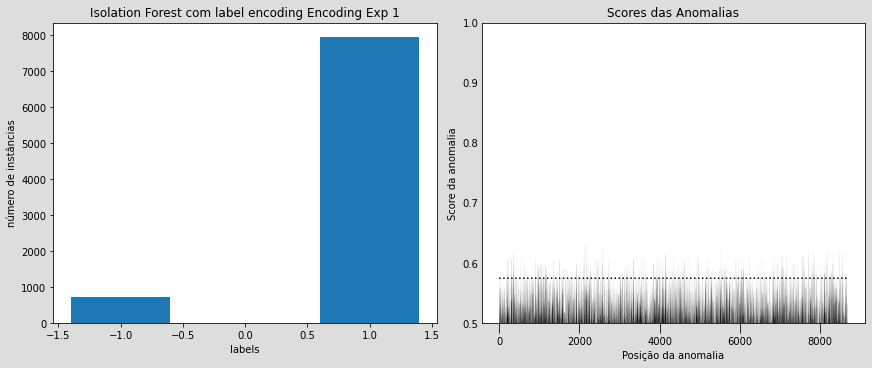

In [290]:
plotaGrafico(anomaly1,labelsPrint, "1", "label encoding")

*Plotting results from experiment 2*

In [262]:
labelsPrint = pegaLabels(predicts2)
print("1 in predictions: " + str(labelsPrint[0]) + " \ -1 in predictions: " + str(labelsPrint[1])) 

1 in predictions: 15376 \ -1 in predictions: 1996


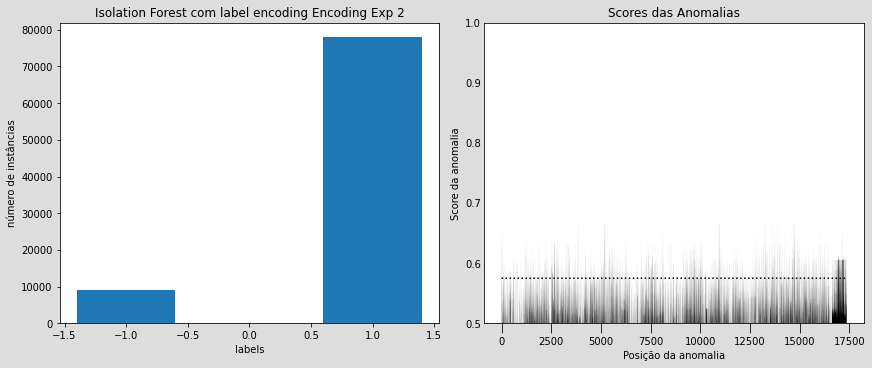

In [270]:
plotaGrafico(anomaly2,labelsPrint, "2", "label encoding")

*Plotting results from experiment 3*

In [263]:
labelsPrint = pegaLabels(predicts3)
print("1 in predictions: " + str(labelsPrint[0]) + " \ -1 in predictions: " + str(labelsPrint[1])) 

1 in predictions: 151479 \ -1 in predictions: 22557


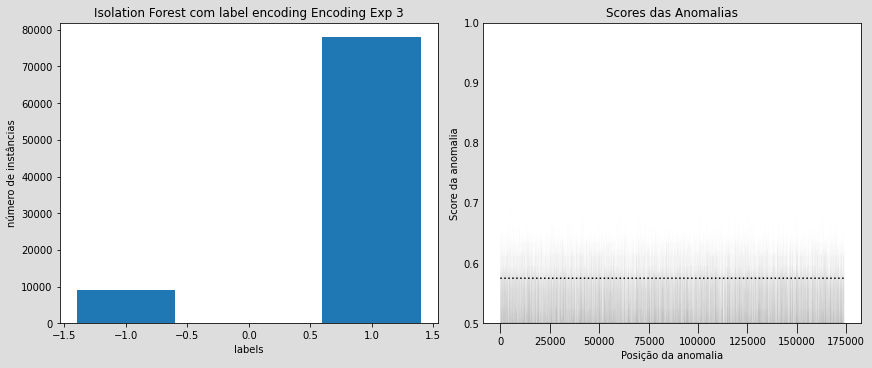

In [271]:
plotaGrafico(anomaly3,labelsPrint, "3", "label encoding")

*Plotting results from experiment 4*

In [266]:
labelsPrint = pegaLabels(predicts4)
print("1 in predictions: " + str(labelsPrint[0]) + " \ -1 in predictions: " + str(labelsPrint[1])) 

1 in predictions: 78011 \ -1 in predictions: 9007


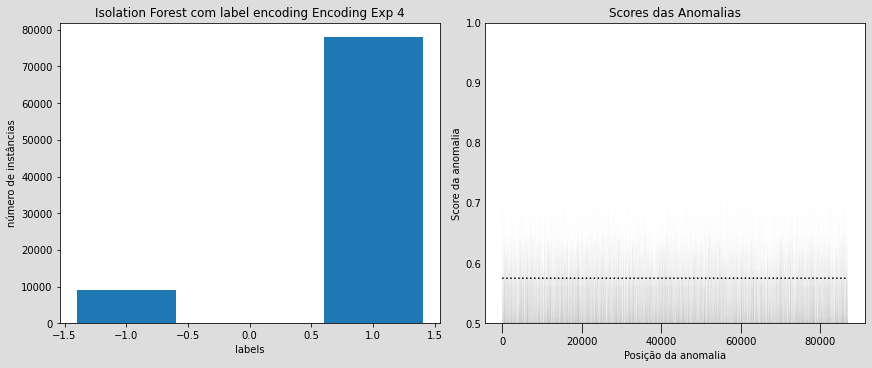

In [272]:
plotaGrafico(anomaly4,labelsPrint, "4", "label encoding")

*Plotting results from experiment 5*

In [137]:
##fazer ainda